# Dietary Restrictions: Eggs

In [1]:
import json
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
# Step 1: Load and Preprocess Data
with open("../data/train.json") as f:
    data = json.load(f)
    
df = pd.DataFrame(data)
df['ingredients_text'] = df['ingredients'].apply(lambda x: ' '.join(x))
X = df['ingredients_text']
y = df['cuisine']    

In [3]:
# Step 2: Train the KNN Model
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Train the KNN model
k = 3
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [4]:
# Step 3: Make Predictions and Evaluate the Model
# Make predictions on the test set
predictions = knn_model.predict(X_test)

# Calculate 'eggs_count' for each row
df['contains_eggs'] = df['ingredients'].apply(lambda x: x.count('eggs'))

# Count the number of eggs per cuisine
eggs_count_per_cuisine = df.groupby("cuisine")['contains_eggs'].sum()

# Create a new column "EggsCount"
df['EggsCount'] = df['cuisine'].map(eggs_count_per_cuisine)

# Get the top 3 cuisines with the least 'eggs_count'
top_3_cuisines_least_eggs = df.groupby('cuisine')['contains_eggs'].mean().sort_values().head(3).index.tolist()

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
confusion_mat = confusion_matrix(y_test, predictions)

In [5]:
print(f"Top 3 Cuisines with the Least Average 'Eggs Count': {top_3_cuisines_least_eggs}")

print(f'Model Accuracy: {accuracy}')

Top 3 Cuisines with the Least Average 'Eggs Count': ['indian', 'moroccan', 'vietnamese']
Model Accuracy: 0.6159648020113137


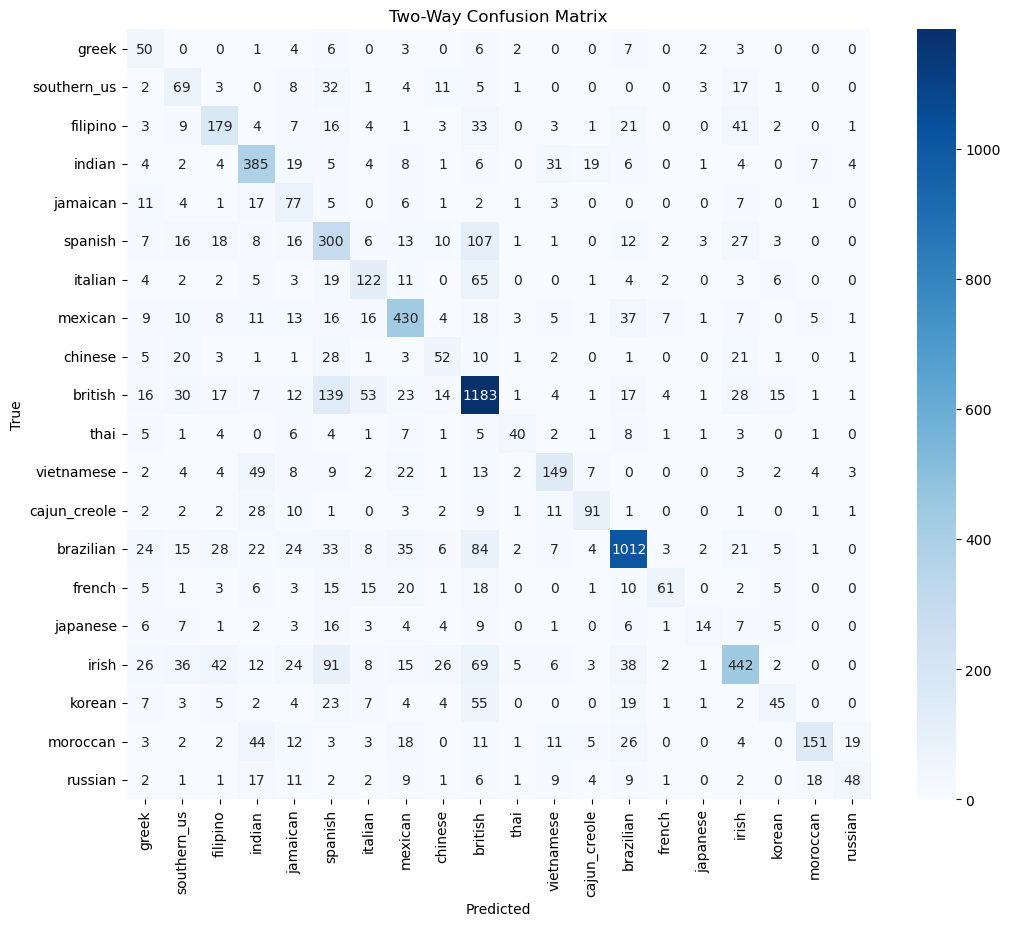

In [6]:
# Plot the two-way confusion matrix
plt.figure(figsize=(12, 10))
sb.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=df['cuisine'].unique(), yticklabels=df['cuisine'].unique())
plt.title('Two-Way Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#The x-axis and y-axis labels represent the true and predicted cuisines, respectively.
#The numbers in each cell of the matrix indicate the count of instances.

In [7]:
df.head(50)

,id,cuisine,ingredients,ingredients_text,contains_eggs,EggsCount
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",romaine lettuce black olives grape tomatoes ga...,0,80
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",plain flour ground pepper salt tomatoes ground...,1,622
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",eggs pepper salt mayonaise cooking oil green c...,1,93
3,22213,indian,"[water, vegetable oil, wheat, salt]",water vegetable oil wheat salt,0,81
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",black pepper shallots cornflour cayenne pepper...,0,81
5,6602,jamaican,"[plain flour, sugar, butter, eggs, fresh ginge...",plain flour sugar butter eggs fresh ginger roo...,1,41
6,42779,spanish,"[olive oil, salt, medium shrimp, pepper, garli...",olive oil salt medium shrimp pepper garlic cho...,0,88
7,3735,italian,"[sugar, pistachio nuts, white almond bark, flo...",sugar pistachio nuts white almond bark flour v...,1,627
8,16903,mexican,"[olive oil, purple onion, fresh pineapple, por...",olive oil purple onion fresh pineapple pork po...,0,326
9,12734,italian,"[chopped tomatoes, fresh basil, garlic, extra-...",chopped tomatoes fresh basil garlic extra-virg...,0,627


# Dietary Restrictions: Peanuts

In [8]:
import json
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix

In [9]:
# Step 1: Load and Preprocess Data
with open("../data/train.json") as f:
    data = json.load(f)

df = pd.DataFrame(data)
df['ingredients_text'] = df['ingredients'].apply(lambda x: ' '.join(x))
X = df['ingredients_text']
y = df['cuisine']

In [10]:
# Step 2: Train the KNN Model
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Train the KNN model
k = 3
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [11]:
# Step 3: Make Predictions and Evaluate the Model
# Make predictions on the test set
predictions = knn_model.predict(X_test)

# Calculate 'peanuts_count' for each row
df['contains_peanuts'] = df['ingredients'].apply(lambda x: x.count('peanuts'))

# Count the number of eggs per cuisine
peanuts_count_per_cuisine = df.groupby("cuisine")['contains_peanuts'].sum()

# Create a new column "EggsCount"
df['PeanutsCount'] = df['cuisine'].map(peanuts_count_per_cuisine)

# Get the top 3 cuisines with the least 'eggs_count'
top_3_cuisines_least_peanuts = df.groupby('cuisine')['contains_peanuts'].mean().sort_values().head(3).index.tolist()

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
confusion_mat = confusion_matrix(y_test, predictions)

In [12]:
print(f"Top 3 Cuisines with the Least Average 'Peanuts Count': {top_3_cuisines_least_peanuts}")

print(f'Model Accuracy: {accuracy}')

Top 3 Cuisines with the Least Average 'Peanuts Count': ['spanish', 'russian', 'french']
Model Accuracy: 0.6159648020113137


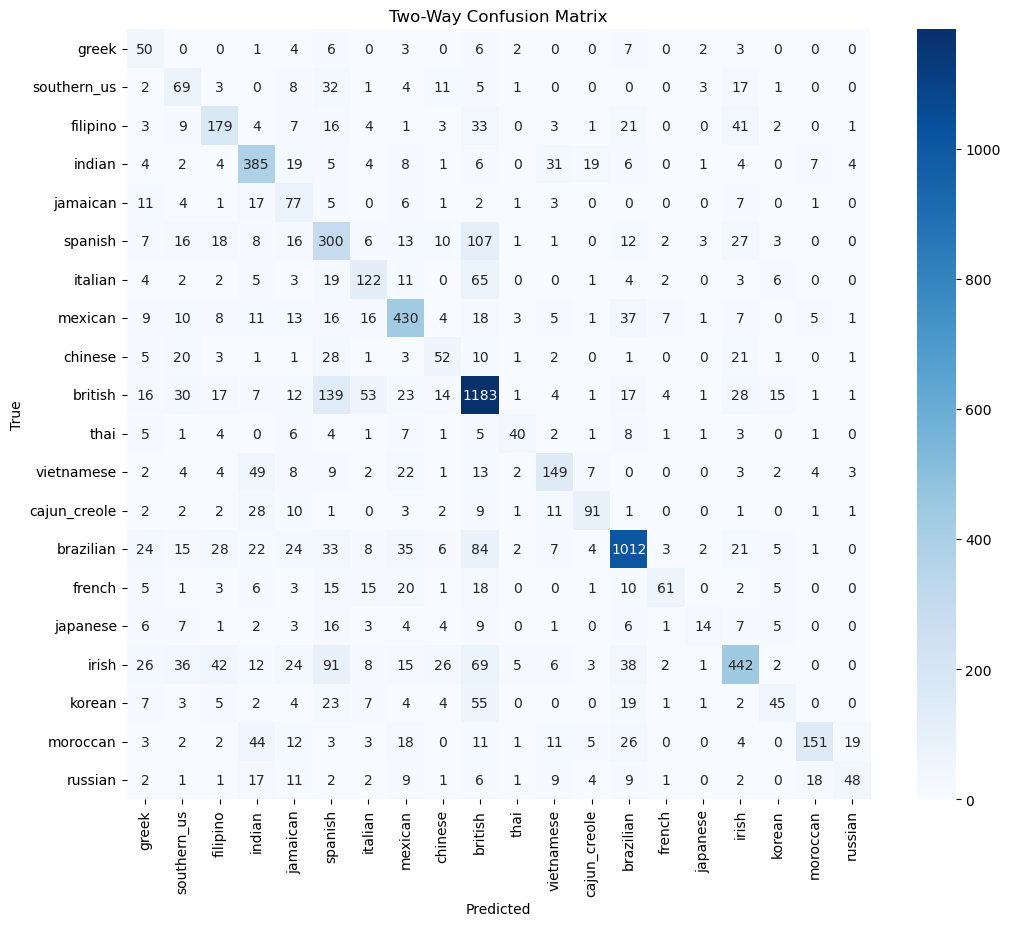

In [13]:
# Plot the two-way confusion matrix
plt.figure(figsize=(12, 10))
sb.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=df['cuisine'].unique(), yticklabels=df['cuisine'].unique())
plt.title('Two-Way Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#The x-axis and y-axis labels represent the true and predicted cuisines, respectively.
#The numbers in each cell of the matrix indicate the count of instances.

In [14]:
df.head(50)

,id,cuisine,ingredients,ingredients_text,contains_peanuts,PeanutsCount
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",romaine lettuce black olives grape tomatoes ga...,0,0
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",plain flour ground pepper salt tomatoes ground...,0,48
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",eggs pepper salt mayonaise cooking oil green c...,0,5
3,22213,indian,"[water, vegetable oil, wheat, salt]",water vegetable oil wheat salt,0,31
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",black pepper shallots cornflour cayenne pepper...,0,31
5,6602,jamaican,"[plain flour, sugar, butter, eggs, fresh ginge...",plain flour sugar butter eggs fresh ginger roo...,0,2
6,42779,spanish,"[olive oil, salt, medium shrimp, pepper, garli...",olive oil salt medium shrimp pepper garlic cho...,0,0
7,3735,italian,"[sugar, pistachio nuts, white almond bark, flo...",sugar pistachio nuts white almond bark flour v...,0,1
8,16903,mexican,"[olive oil, purple onion, fresh pineapple, por...",olive oil purple onion fresh pineapple pork po...,0,11
9,12734,italian,"[chopped tomatoes, fresh basil, garlic, extra-...",chopped tomatoes fresh basil garlic extra-virg...,0,1


# Dietary Restrictions: Seafood (shrimp, lobster, fish, crab)

In [15]:
import json
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix

In [16]:
# Step 1: Load and Preprocess Data
with open("../data/train.json") as f:
    data = json.load(f)

df = pd.DataFrame(data)
df['ingredients_text'] = df['ingredients'].apply(lambda x: ' '.join(x))
X = df['ingredients_text']
y = df['cuisine']

In [17]:
# Step 2: Train the KNN Model
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Train the KNN model
k = 3
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [18]:
# Step 3: Make Predictions and Evaluate the Model
# Make predictions on the test set
predictions = knn_model.predict(X_test)

# Calculate 'seafood_count' for each row
seafood_keywords = ['shrimp', 'lobster', 'fish', 'crab', 'mussel', 'oyster', 'scallop', 'squid', 'octopus']
df['contains_seafood'] = df['ingredients'].apply(lambda x: sum(keyword in x for keyword in seafood_keywords))

# Count the number of seafood occurrences per cuisine
seafood_count_per_cuisine = df.groupby("cuisine")['contains_seafood'].sum()

# Create a new column "SeafoodCount"
df['SeafoodCount'] = df['cuisine'].map(seafood_count_per_cuisine)

# Get the top 3 cuisines with the least 'seafood_count'
top_3_cuisines_least_seafood = df.groupby('cuisine')['contains_seafood'].mean().sort_values().head(3).index.tolist()

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
confusion_mat = confusion_matrix(y_test, predictions)

In [19]:
print(f"Top 3 Cuisines with the Least Average 'Seafood Count': {top_3_cuisines_least_seafood}")

print(f'Model Accuracy: {accuracy}')

Top 3 Cuisines with the Least Average 'Seafood Count': ['irish', 'russian', 'moroccan']
Model Accuracy: 0.6159648020113137


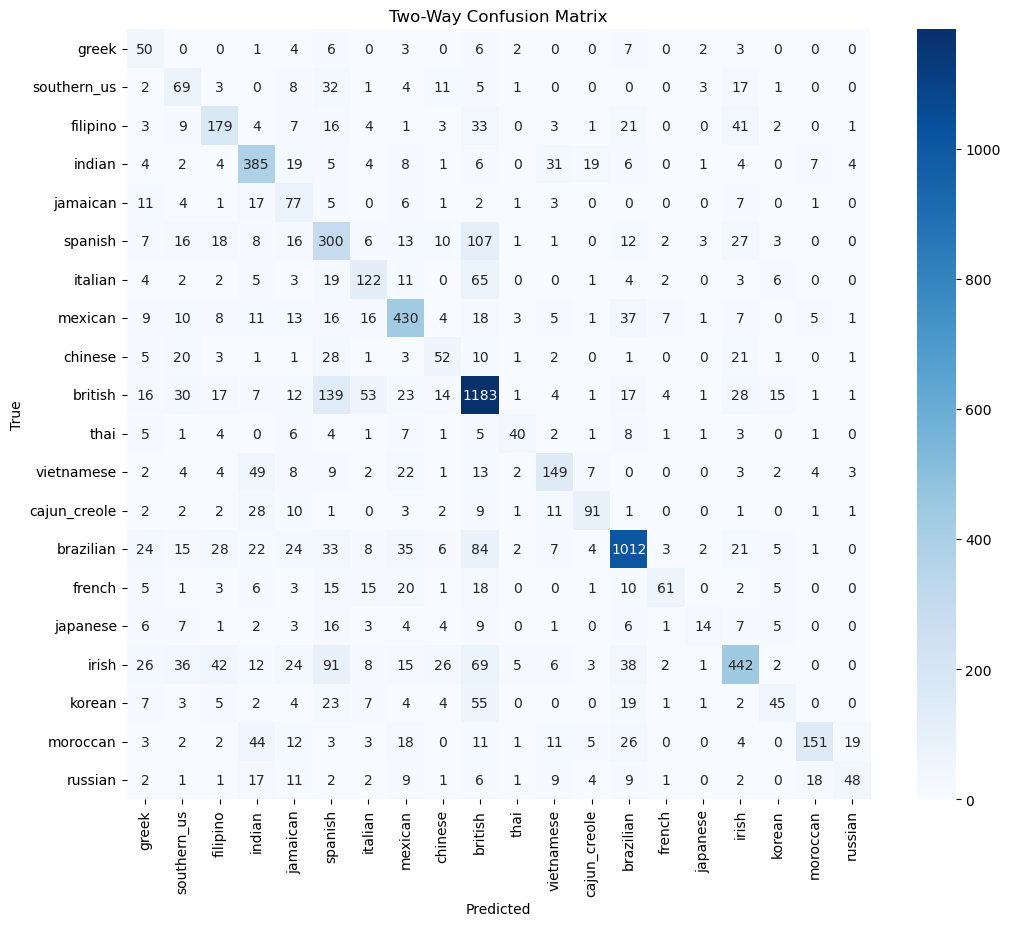

In [20]:
# Plot the two-way confusion matrix
plt.figure(figsize=(12, 10))
sb.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=df['cuisine'].unique(), yticklabels=df['cuisine'].unique())
plt.title('Two-Way Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#The x-axis and y-axis labels represent the true and predicted cuisines, respectively.
#The numbers in each cell of the matrix indicate the count of instances.

In [21]:
df.head(50)

,id,cuisine,ingredients,ingredients_text,contains_seafood,SeafoodCount
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",romaine lettuce black olives grape tomatoes ga...,0,12
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",plain flour ground pepper salt tomatoes ground...,0,109
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",eggs pepper salt mayonaise cooking oil green c...,0,55
3,22213,indian,"[water, vegetable oil, wheat, salt]",water vegetable oil wheat salt,0,30
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",black pepper shallots cornflour cayenne pepper...,0,30
5,6602,jamaican,"[plain flour, sugar, butter, eggs, fresh ginge...",plain flour sugar butter eggs fresh ginger roo...,0,18
6,42779,spanish,"[olive oil, salt, medium shrimp, pepper, garli...",olive oil salt medium shrimp pepper garlic cho...,0,58
7,3735,italian,"[sugar, pistachio nuts, white almond bark, flo...",sugar pistachio nuts white almond bark flour v...,0,111
8,16903,mexican,"[olive oil, purple onion, fresh pineapple, por...",olive oil purple onion fresh pineapple pork po...,0,77
9,12734,italian,"[chopped tomatoes, fresh basil, garlic, extra-...",chopped tomatoes fresh basil garlic extra-virg...,0,111


# Dietary Restrictions: Dairy(milk, dairy, yoghurt, cheese)

In [22]:
import json
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix

In [23]:
# Step 1: Load and Preprocess Data
with open('../data/train.json') as f:
    data = json.load(f)

df = pd.DataFrame(data)
df['ingredients_text'] = df['ingredients'].apply(lambda x: ' '.join(x))
X = df['ingredients_text']
y = df['cuisine']

In [24]:
# Step 2: Train the KNN Model
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Train the KNN model
k = 3
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [25]:
# Step 3: Make Predictions and Evaluate the Model
# Make predictions on the test set
predictions = knn_model.predict(X_test)

# Calculate 'dairy_count' for each row
dairy_keywords = ['milk', 'dairy', 'yogurt', 'cheese']
df['contains_dairy'] = df['ingredients'].apply(lambda x: sum(keyword in x for keyword in dairy_keywords))

# Count the number of dairy occurrences per cuisine
dairy_count_per_cuisine = df.groupby("cuisine")['contains_dairy'].sum()

# Create a new column "DairyCount"
df['DairyCount'] = df['cuisine'].map(dairy_count_per_cuisine)

# Get the top 3 cuisines with the least 'dairy_count'
top_3_cuisines_least_dairy = df.groupby('cuisine')['contains_dairy'].mean().sort_values().head(3).index.tolist()

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
confusion_mat = confusion_matrix(y_test, predictions)

In [26]:
print(f"Top 3 Cuisines with the Least Average 'Dairy Count': {top_3_cuisines_least_dairy}")

print(f'Model Accuracy: {accuracy}')

Top 3 Cuisines with the Least Average 'Dairy Count': ['korean', 'thai', 'vietnamese']
Model Accuracy: 0.6159648020113137


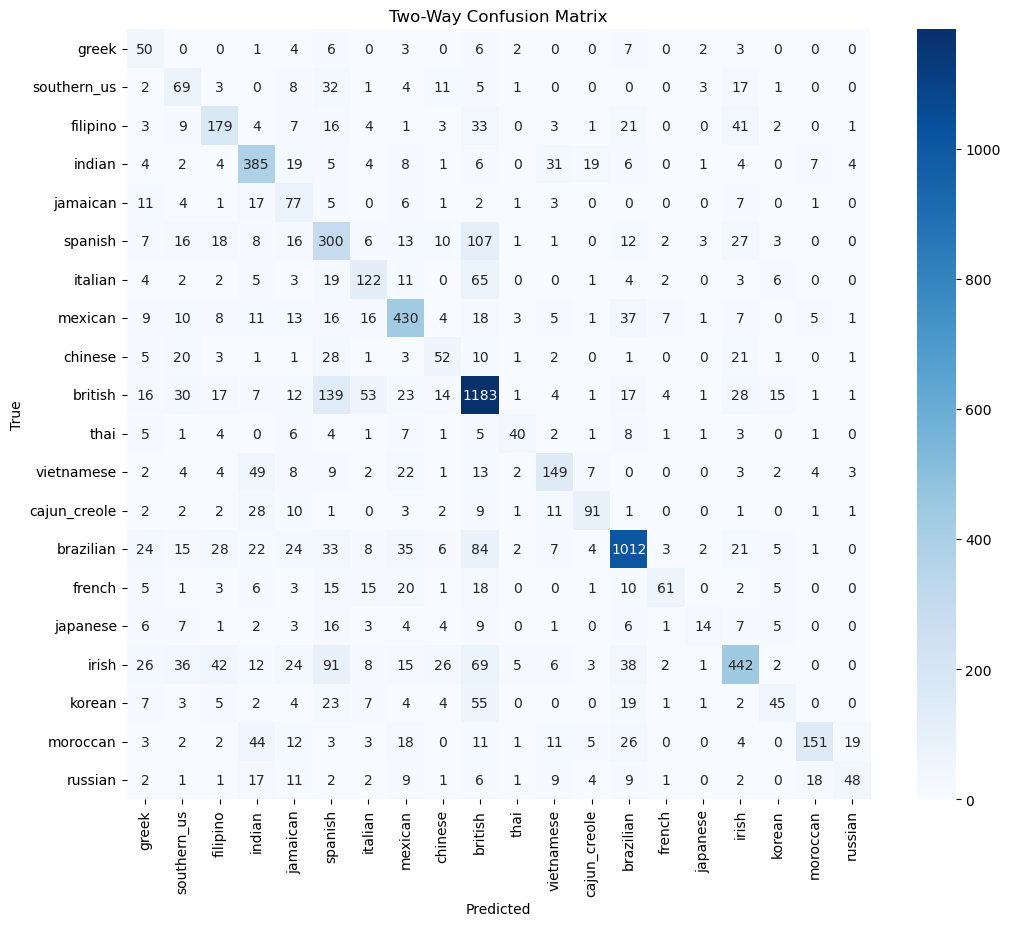

In [27]:
# Plot the two-way confusion matrix
plt.figure(figsize=(12, 10))
sb.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=df['cuisine'].unique(), yticklabels=df['cuisine'].unique())
plt.title('Two-Way Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [28]:
df.head(50)

,id,cuisine,ingredients,ingredients_text,contains_dairy,DairyCount
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",romaine lettuce black olives grape tomatoes ga...,0,61
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",plain flour ground pepper salt tomatoes ground...,1,674
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",eggs pepper salt mayonaise cooking oil green c...,0,29
3,22213,indian,"[water, vegetable oil, wheat, salt]",water vegetable oil wheat salt,0,164
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",black pepper shallots cornflour cayenne pepper...,1,164
5,6602,jamaican,"[plain flour, sugar, butter, eggs, fresh ginge...",plain flour sugar butter eggs fresh ginger roo...,1,28
6,42779,spanish,"[olive oil, salt, medium shrimp, pepper, garli...",olive oil salt medium shrimp pepper garlic cho...,0,50
7,3735,italian,"[sugar, pistachio nuts, white almond bark, flo...",sugar pistachio nuts white almond bark flour v...,0,404
8,16903,mexican,"[olive oil, purple onion, fresh pineapple, por...",olive oil purple onion fresh pineapple pork po...,0,432
9,12734,italian,"[chopped tomatoes, fresh basil, garlic, extra-...",chopped tomatoes fresh basil garlic extra-virg...,0,404
